# Spam Sms Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Reading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [ ]:
data = data.iloc[:,:2]
data.columns = ['label','text']
data['label'] = data['label'].map({'ham':0, 'spam':1})

<ipython-input-7-59f9a56a7458>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham':0, 'spam':1})


In [ ]:
print(data.columns)

Index(['label', 'text'], dtype='object')


## Preprocessing the dataset

In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(f"[{string.punctuation}]",'',text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text


In [ ]:
data['text'] = data['text'].apply(preprocess_text)

### Vectorizing

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['label']

## Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Training the model

In [ ]:

# Define the SVM model
model = SVC(kernel='linear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


## Validation

In [ ]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc:.4f}")




SVM Accuracy: 0.9704


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

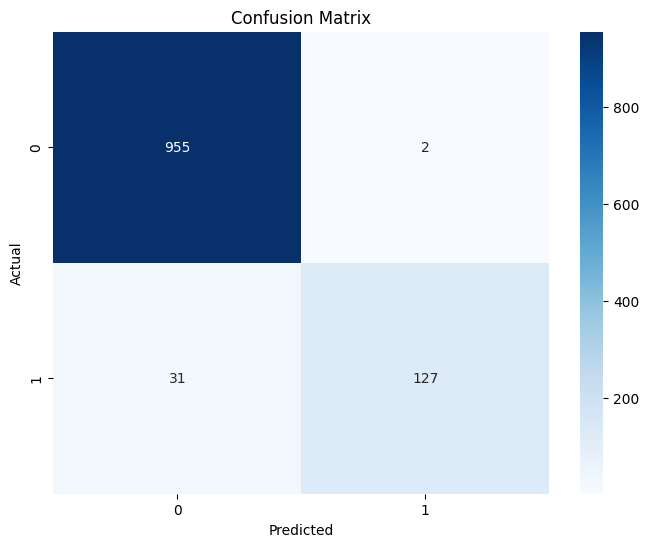

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## tesing with a example

In [ ]:
def predict_sms(message):
  processed_message = preprocess_text(message)
  message_vector = vectorizer.transform([processed_message])
  prediction = model.predict(message_vector)
  return "Spam" if prediction[0] == 1 else "not spam"

sms = input("enter an sms message :")
print('prediction', predict_sms(sms))

enter an sms message :This is a dummy example mail
prediction not spam
